In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt

# we use the scikit svm model for this experiment 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

import scikitplot as skplt

In [2]:
# import scarcity labeled ads
df = pd.read_csv('./data/scarcity_dataset.csv')
df

,ad,scarcity
0,it’s almost over the shortcut law that lets yo...,1
1,on sale this week sequel to nyt bestseller pro...,1
2,refugees are especially vulnerable to the dang...,1
3,we are motivating reminding and supporting vot...,1
4,the future of decentralized nomadic coliving i...,1
...,...,...
17995,parents take part in the study of the impact o...,0
17996,lincoln news lincoln mayor orders greater rest...,0
17997,joe biden beat the nra twice he got assault we...,0
17998,reid nearly lost his eye to cancer thanks to t...,0


In [3]:
X_train, X_test,  y_train, y_test = train_test_split(df['ad'], df['scarcity'], test_size =0.2, random_state=42)

In [4]:
# Use term frequency to represent documents
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [5]:
# training the model using a linear kernal
clf = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
clf.fit(X_train_tf, y_train)

SVC(gamma='auto', kernel='linear')

accuracy:   0.932
              precision    recall  f1-score   support

 no scarcity       0.93      0.93      0.93      1781
    scarcity       0.93      0.93      0.93      1819

    accuracy                           0.93      3600
   macro avg       0.93      0.93      0.93      3600
weighted avg       0.93      0.93      0.93      3600

confusion matrix:
[[1655  126]
 [ 119 1700]]



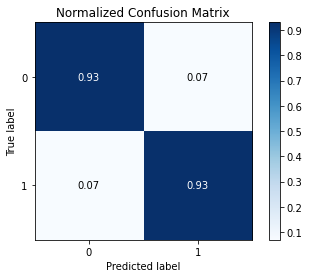

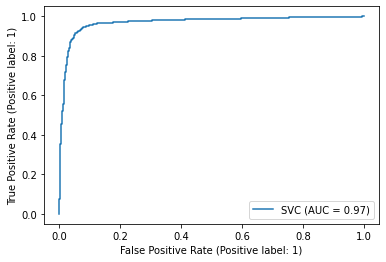

In [6]:
# predict the labels on validation dataset
predictions = clf.predict(X_test_tf)

# compute the performance measures
score = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, predictions, target_names=['no scarcity', 'scarcity']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()
svc_disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [7]:
df_val = pd.read_csv('./data/sample_scarcity.csv')
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['scarcity']

accuracy:   0.804
              precision    recall  f1-score   support

 no scarcity       0.79      0.84      0.81       101
    scarcity       0.82      0.77      0.79        98

    accuracy                           0.80       199
   macro avg       0.81      0.80      0.80       199
weighted avg       0.81      0.80      0.80       199

confusion matrix:
[[85 16]
 [23 75]]



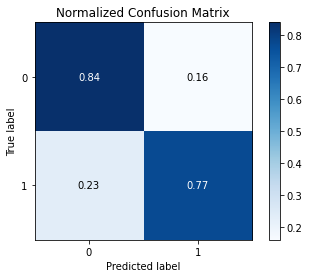

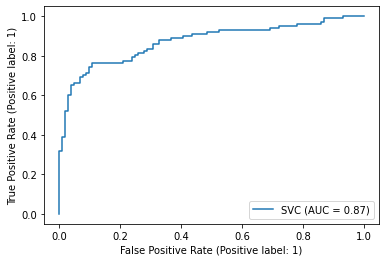

In [8]:
y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'no scarcity', 'scarcity']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)